<a href="https://colab.research.google.com/github/Sulthandfb/streamlit-mobil/blob/main/Klasterisasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

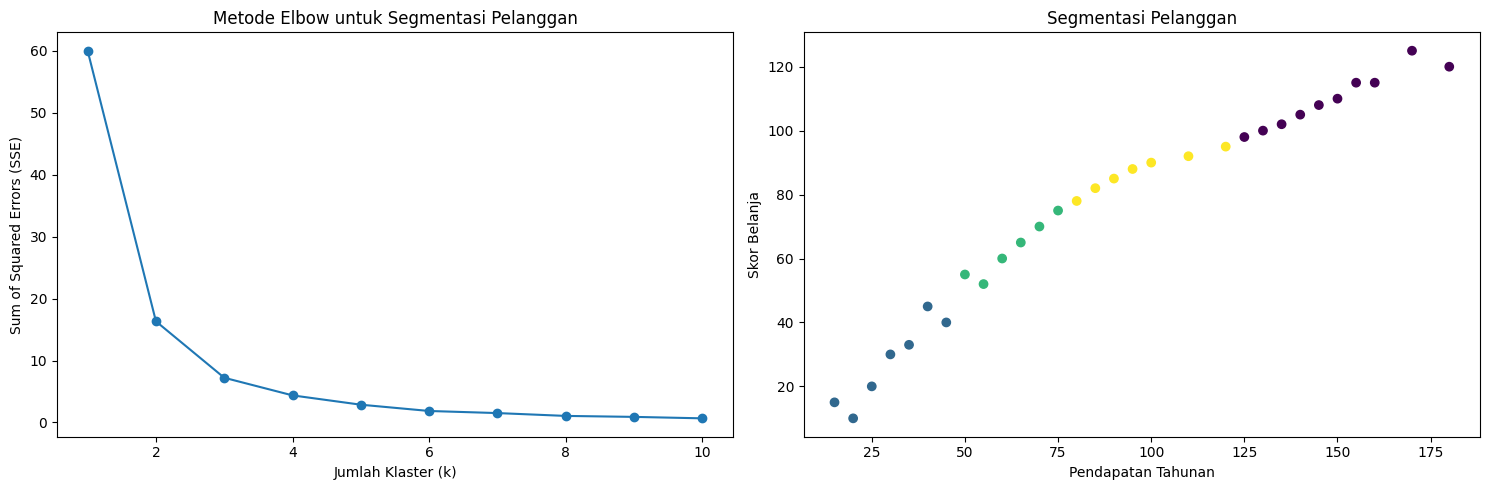

        Annual_Income           Spending_Score         
                 mean  min  max           mean min  max
Cluster                                                
0          149.000000  125  180     109.800000  98  125
1           30.000000   15   45      27.571429  10   45
2           62.500000   50   75      62.833333  52   75
3           97.142857   80  120      87.142857  78   95


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Dataset simulasi perilaku belanja pelanggan
def load_customer_data():
    data = {
        'Annual_Income': [15, 35, 45, 55, 60, 70, 80, 90, 100, 120, 130, 140, 150, 160, 180,
                          20, 25, 30, 40, 50, 65, 75, 85, 95, 110, 125, 135, 145, 155, 170],
        'Spending_Score': [15, 33, 40, 52, 60, 70, 78, 85, 90, 95, 100, 105, 110, 115, 120,
                           10, 20, 30, 45, 55, 65, 75, 82, 88, 92, 98, 102, 108, 115, 125]
    }
    return pd.DataFrame(data)

# Proses clustering dengan metode Elbow
def customer_segmentation():
    # Load data
    df = load_customer_data()

    # Preprocessing
    X = df[['Annual_Income', 'Spending_Score']]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Metode Elbow
    sse = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_scaled)
        sse.append(kmeans.inertia_)

    # Visualisasi
    plt.figure(figsize=(15, 5))

    # Plot Elbow
    plt.subplot(1, 2, 1)
    plt.plot(range(1, 11), sse, marker='o')
    plt.title('Metode Elbow untuk Segmentasi Pelanggan')
    plt.xlabel('Jumlah Klaster (k)')
    plt.ylabel('Sum of Squared Errors (SSE)')

    # Plot Clustering dengan k optimal
    plt.subplot(1, 2, 2)

    # Pilih k=4 berdasarkan elbow
    kmeans = KMeans(n_clusters=4, random_state=42)
    df['Cluster'] = kmeans.fit_predict(X_scaled)

    # Scatter plot
    plt.scatter(df['Annual_Income'], df['Spending_Score'], c=df['Cluster'], cmap='viridis')
    plt.title('Segmentasi Pelanggan')
    plt.xlabel('Pendapatan Tahunan')
    plt.ylabel('Skor Belanja')

    plt.tight_layout()
    plt.show()

    return df

# Jalankan analisis
customer_segments = customer_segmentation()
print(customer_segments.groupby('Cluster').agg({
    'Annual_Income': ['mean', 'min', 'max'],
    'Spending_Score': ['mean', 'min', 'max']
}))
